# Analysis of Parkinson Disease 

## UCI Machine learning repository - Parkinson's Disease Classification Data Set 
### Source:  https://archive.ics.uci.edu/ml/machine-learning-databases/00470/

## Introduction

Parkinson disease affects the nervous system of human being and creates a movement disorder. It gradually start in the system and gets worser over time. People with this disease find it very difficult to balance themselves while walking or talking. This occurs due to the drop in dopamine level in human brain. Early symptoms for this disease are tremor in hands or fingers, slowed movement and the changes in voice and writing. 

Diagonising this disease earlier stages is imperative to control or cure. Occurance of one or more symptoms can be confirmed to be affected by parkinson. But, there are other similar diseases also. So, proper physician diagonis is important.

## Source data collection details

###### Collection Source: Physician's Examination using phonation.
###### Data Extraction: Phonation of vowel /a/ using the microphone at 44.1 KHz
##### Attribute Extraction methods: Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment. (from dataset source)


## Details of the extracted dataset

- ###### Number of Instances (rows): 756
- ###### Number of Attributes (columns or features): 754
- ###### Number of unique people tested: 252 [3 voice records per individual]
- ###### Number of parkinson patients: 188 [107 Men, 81 Women]
- ###### Number of normal people: 64 [41 Men, 23 Women]

Age is not mentioned in the dataset. But, the dataset source mentioned PD patients ages ranging from 33 to 87 and normal people ages ranging from 41 to 82. 

##### Target variable
- class: 0 (Disease negative), 1 (Disease positive)

## Data Exploration and Analytics

1. Exploring data
2. Person based exploration
3. Correlation of independent variables on target variable
4. Linear Regression model
5. ROC-AUC Curve

### Research works using this dataset

Dataset Source work:
Sakar, C. Okan, et al. "A comparative analysis of speech signal processing algorithms for Parkinson’s disease classification and the use of the tunable Q-factor wavelet transform." Applied Soft Computing 74 (2019): 255-263.

Works used this dataset:

Gunduz, Hakan. "Deep Learning-Based Parkinson’s Disease Classification Using Vocal Feature Sets." IEEE Access 7 (2019): 115540-115551.

Tuncer, Turker, Sengul Dogan, and U. Rajendra Acharya. "Automated detection of Parkinson's disease using minimum average maximum tree and singular value decomposition method with vowels." Biocybernetics and Biomedical Engineering (2019).




#### Importance of voice analysis:
Voice analysis is a common approach to identify the Parkinson's Disease. After affected by the disease, people will be shown symptoms in many forms like tremor in hands/fingers, changes in writing and voice changes. But vocal test is important because 78% of early Parkinson's disease patients show some sort of vocal disorder[1]. So, it is easy to identify the disease in it's early stages using voice analysis.


[1] Rusz J, Cmejla R, Ruzickova H, Ruzicka E. Quantitative acoustic measurements for characterization of speech and voice disorders in early untreated Parkinson’s disease. The journal of the Acoustical Society of America. 2011 Jan;129(1):350–67.J. Acoust. Soc. Am., 129 (1) (2011), pp. 350–367 pmid:21303016

#### Nature of Task: **Classification** 

#### RESULT: Minimum number of features required to explain Parkinson Disease with 70% ROC - AUC : 2 (DFA and RPDE)

### Exploration data analysis

In [2]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Study/csir-courselist/firstwork/pd_speech_features/pd_speech_features.csv", skiprows=1)

In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
df.shape

(756, 755)

In [5]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

The dataset has 756 instances and 754 attributes (excluding id). Each id consists of 3 values which means three voice records were taken from every person. Let's extract the person based information

#### Analysing person based information 

In [6]:
df_id = df.drop_duplicates(subset=['id','gender'],keep='first')

In [7]:
df_id['class'].value_counts() ## Here, 1 is patient and 0 is normal people

1    188
0     64
Name: class, dtype: int64

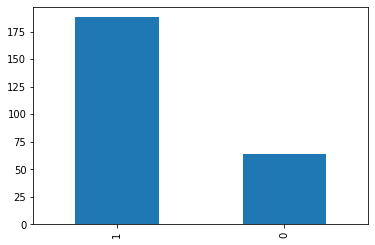

In [8]:
df_id['class'].value_counts().plot.bar()
plt.show()

In [9]:
df_id.groupby('class')['gender'].value_counts()

class  gender
0      0          41
       1          23
1      1         107
       0          81
Name: gender, dtype: int64

In [10]:
df_id.groupby('gender')['class'].value_counts()

gender  class
0       1         81
        0         41
1       1        107
        0         23
Name: class, dtype: int64

#### 188 Parkinson affected patients and 64 normal people were subjected to test. From affected people 107 were men and 81 were women and from normal people 41 were men and 23 were women

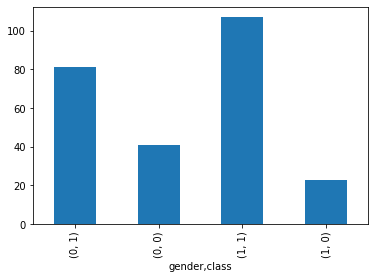

In [11]:
df_id.groupby('gender')['class'].value_counts().plot.bar()
plt.show()

In [12]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


Let's try to plot basic features and few more features to see it's pattern in the dataset

#### Feature Analysis

C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\seaborn\distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


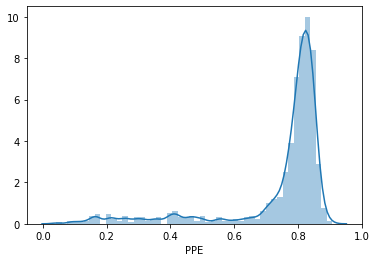

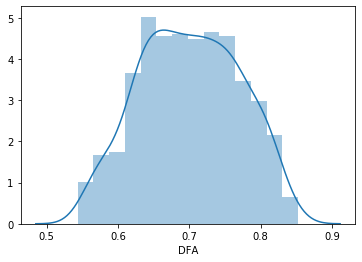

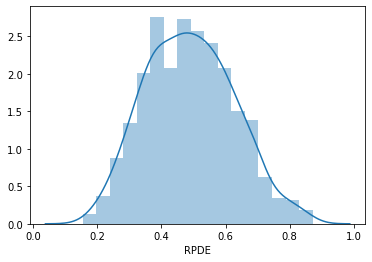

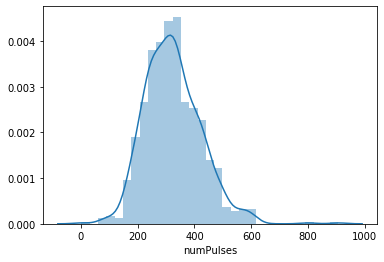

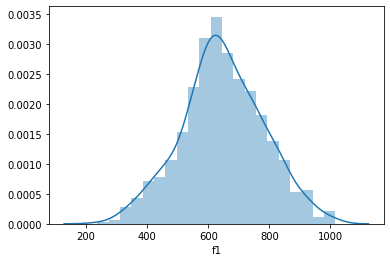

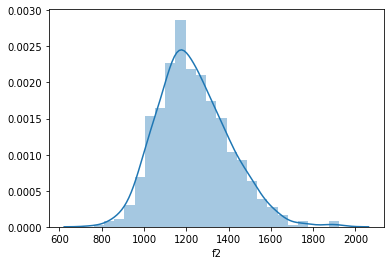

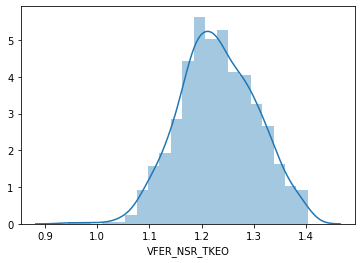

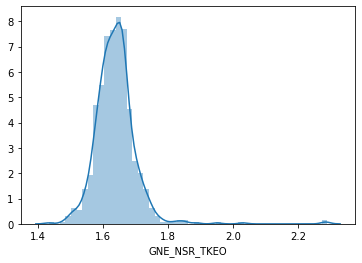

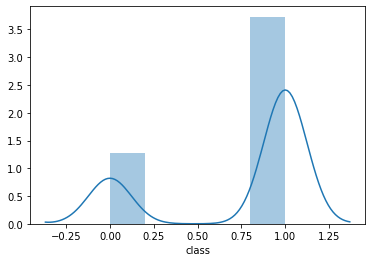

In [13]:
columns_to_plot = ['PPE','DFA','RPDE','numPulses', 'f1', 'f2', 'VFER_NSR_TKEO', 'GNE_NSR_TKEO','class']
for each in columns_to_plot:
    sns.distplot(df[each])
    plt.show()

From above plots, out of three nonlinear dynamical systems theory values (RPDE, DFA and PPA), *RPDE (Recurrence Pitch Density Entropy)* is following normal distribution (approximately). *Detrended Fluctuation Analysis (DFA)* values are available between 0.55 to 0.85. Since these two values are used to identify the general voice disorders, we can use these values to infer the problems. 

Reference: 
Little M. A. (2007). Biomechanically Informed Nonlinear Speech Signal Processing. D.Phil. Thesis, University of Oxford, Oxford

C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


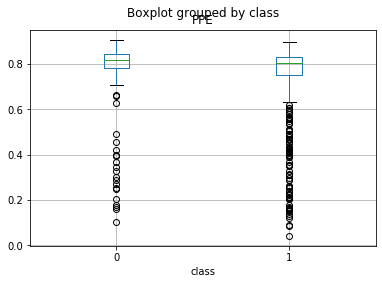

C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


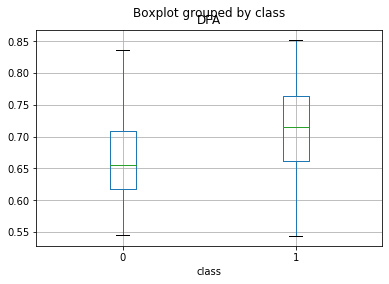

C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


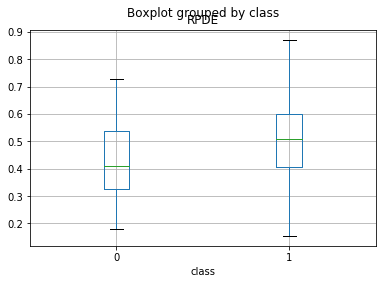

In [15]:
columns_box_plot = ['PPE','DFA','RPDE']
for each in columns_box_plot:
    df.boxplot(column=each, by='class')
    plt.show()

PPE has no difference for normal people and patients. But, RPDE and DFA has higher values for patients compared to normal people. So, these two can be used as predictors while building the model.

Few other features are following normal distribution. For example, numPulses, f1, f2, VFER_NSR_TKEO, GNE_NSR_TKEO, etc., These features could help in providing better results for models such as logistic regression. 

It is also notable that many features are derived from other features. E.g., det_entropy_log_3_coef, det_entropy_log_4_coef,..., det_entropy_log_10_coef. These might result in multicolinearity. i.e., the higher correlation between independet variables. We might have to delete these features. This needs to be taken care while devising a ML model.

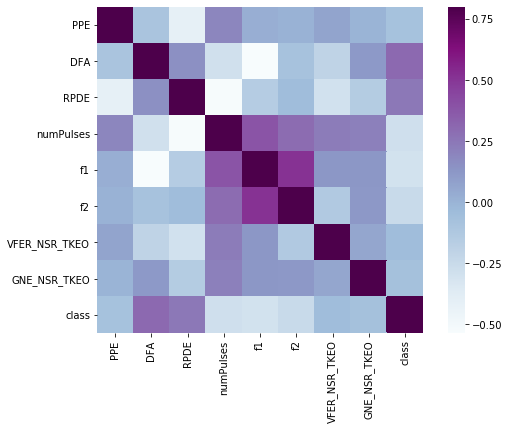

In [15]:
matrix = df[['PPE','DFA','RPDE','numPulses', 'f1', 'f2', 'VFER_NSR_TKEO', 'GNE_NSR_TKEO','class']].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.show()

Let's train and predict the dataset using Logistic Regression ML model.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [17]:
## Since we have id thrice in the column, we need to split based on the id
#X = df[['DFA','RPDE']]
#y = df['class']

In [18]:
import random
unique_indices = df['id'].unique()
random.shuffle(unique_indices)
no_of_unique_records = len(df['id'].unique())
train_size = round(no_of_unique_records * 0.7)
train_elements = unique_indices[:train_size]
test_elements = unique_indices[train_size:]
#test_elements
#train_elements

In [19]:
#x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
train_vals = df[df.apply(lambda x: x['id'] in train_elements.tolist(),axis=1)]
test_vals = df[df.apply(lambda x: x['id'] in test_elements.tolist(),axis=1)]
x_train = train_vals[['DFA','RPDE']]
y_train = train_vals['class']
x_cv = test_vals[['DFA','RPDE']]
y_cv = test_vals['class']

In [20]:
my_logit_model = LogisticRegression()
my_logit_model.fit(x_train, y_train)

kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(my_logit_model, x_train, y_train, cv=kfold)
print("Logistic Regression Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Logistic Regression Accuracy: 73.82% (10.41%)


C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users

In [21]:
from sklearn.metrics import roc_curve, auc
y_score = my_logit_model.decision_function(x_cv)
#roc_curve(y_cv, y_score)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr[0], tpr[0], _ = roc_curve(y_cv, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_cv.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

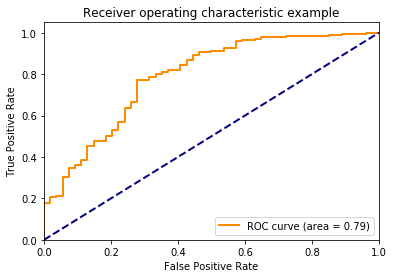

In [22]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Curve Area is 71%. It implies DFA and RPDE are enough to explain the results. Addition of PPE with this has reduced the cross validation score and ROC Area which implies it is not clearly differentiating the disease from normal people (as we already claimed).